In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import mne
import yasa
import matplotlib.pyplot as plt

C:\Users\Origin\AppData\Roaming\Python\Python38\site-packages\antropy\fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))


In [3]:
def Filter_init(l_freq_p=0.5, h_freq_p=4, l_freq_s=0.1, h_freq_s=5, fs=500, order=2):
    LowPassFre = h_freq_p
    HighPassFre = l_freq_p

    h_freq_p = h_freq_p * 2 / fs
    l_freq_p = l_freq_p * 2 / fs
    wp = [l_freq_p, h_freq_p]

    h_freq_s = h_freq_s * 2 / fs
    l_freq_s = l_freq_s * 2 / fs
    ws = [l_freq_s, h_freq_s]

    N, wn = signal.buttord(wp, ws, 5, 40)
    N = order

    b, a = signal.butter(N, wn, "bandpass")

    w, gd = signal.group_delay((b, a), w=500, fs=500)

    Filter_Delay = np.mean(gd[np.min(np.where(w > HighPassFre)): np.max(np.where(w < LowPassFre))])

    Filter_Delay = round(Filter_Delay) // 2

    delay = np.zeros(Filter_Delay, dtype=np.float64)

    return b, a, N, Filter_Delay, delay
b, a, N, Filter_Delay, delay = Filter_init(0.5, 4, 0.1, 5, 500, 2)

C:\Users\Origin\AppData\Local\Temp\ipykernel_36732\45790364.py:18: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w, gd = signal.group_delay((b, a), w=500, fs=500)


In [43]:
def SO_filter(b, a, x):
    y = signal.filtfilt(b, a, x)
    return y

In [ ]:
def total_analysis(dataSet, fs=500):
    down_min_set = []
    up_max_set = []
    down_duration_set = []
    up_duration_set = []
    for i in range(len(dataSet)):
        data = dataSet[i]
        down_min = min(data[:fs])
        up_max = max(data[fs:])
        down_duration = 0.
        up_duration = 0.
        
        for j in range(fs-1):
            if data[j] * data[j + 1] <= 0 <= data[j]:
                down_duration = (fs - j) / fs
                break
            
        for j in range(fs-1):
            if data[fs+j] * data[fs+j+1] <= 0 and data[fs+j] >= 0:
                up_duration = j / fs
                break
        
        down_min_set.append(down_min)
        up_max_set.append(up_max)
        down_duration_set.append(down_duration)
        up_duration_set.append(up_duration)

In [116]:
def avg_analysis(data, fs=500):
    down_min = min(data[:fs])
    up_max = max(data[fs:])
    down_duration = 0.
    up_duration = 0.
    
    for i in range(fs-1):
        if data[i] * data[i + 1] <= 0 <= data[i]:
            down_duration = (fs - i) / fs
            break
    
    for i in range(fs-1):
        if data[fs+i] * data[fs+i+1] <= 0 and data[fs+i] >= 0:
            up_duration = i / fs
            break
    
    print("Minimum of down state: %.3fuV" % down_min)
    print("Maximum of up state: %.3fuV" % up_max)
    print("Duration of down state: %.1fms" % (down_duration * 1000))
    print("Duration of up state: %.1fms" % (up_duration * 1000))
    print()
    
    return down_min, up_max, down_duration, up_duration
    

In [72]:
subject = "41-2023_09_26-LiJinyu-Female"
Amplifier = "BP"
pick_channel = "C3"
ref_channel = "M2"
fs = 500

In [73]:
SaveLabel = "F:/%s" % subject
dataPath = SaveLabel + "/Sleep.vhdr"
if Amplifier == "ANT":
    C3 = 14  # C3 channel index in amplifier
    M2 = 18  # M2 channel index in amplifier
    EOG = 70  # EOG channel index in amplifier
    EMG = 71  # EMG channel index in amplifier
    EMGREF = 0  # EMGREF channel index in amplifier
elif Amplifier == "BP":
    C3 = 4  # C3 channel index in amplifier
    M2 = 31  # M2 channel index in amplifier
    EOG = 57  # EOG channel index in amplifier
    EMG = 52  # EMG channel index in amplifier
    EMGREF = 0  # EMGREF channel index in amplifier

In [90]:
raw = mne.io.read_raw_brainvision(dataPath, preload=True)
raw.pick([pick_channel, ref_channel])
raw.set_eeg_reference([ref_channel])
raw.filter(0.1, 40)
raw.pick([pick_channel])

Extracting parameters from F:/41-2023_09_26-LiJinyu-Female/Sleep.vhdr...
Setting channel info structure...
Reading 0 ... 13859379  =      0.000 ... 27718.758 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s finished


<RawBrainVision | Sleep.eeg, 1 x 13859380 (27718.8 s), ~105.7 MB, data loaded>

In [91]:
# sw = yasa.sw_detect(data=raw, sf=500, ch_names=["C3"], freq_sw=[0.5, 4], amp_neg=[40, 200], amp_pos=[10, 150])
sw = yasa.sw_detect(data=raw, sf=500, ch_names=["C3"])
slow_Wave_offline = sw.summary()

onset = np.array(slow_Wave_offline["Start"]) * fs
onset = onset.astype(int)

duration = np.array(slow_Wave_offline["Duration"]) * fs
duration = duration.astype(int)

offline_description = []
for i in range(len(slow_Wave_offline["Start"])):
    offline_description.append("SO_yasa")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


In [92]:
data, _ = raw[:]
data = data[0] * 1e6
data_filt = SO_filter(b, a, data)

In [93]:
so_wave_set = []
so_wave_filt_set = []

for i in range(len(onset)):
    startPoint = onset[i]
    for j in range(duration[i] - 1):
        point = startPoint + j
        if data_filt[point] * data_filt[point+1] <= 0 and data_filt[point] <= 0:
            so_wave = data[point - 500: point + 500]
            so_wave_filt = data_filt[point - 500: point + 500]
            
            so_wave_set.append(so_wave)
            so_wave_filt_set.append(so_wave_filt)
            break
so_wave_set = np.array(so_wave_set)
so_wave_filt_set = np.array(so_wave_filt_set)
print(so_wave_set.shape)

(1329, 1000)


In [118]:
so_wave_avg = np.mean(so_wave_set, axis=0)
so_wave_filt_avg = np.mean(so_wave_filt_set, axis=0)
avg_analysis(so_wave_avg)
avg_analysis(so_wave_filt_avg)

Minimum of down state: -77.701uV
Maximum of up state: 17.673uV
Duration of down state: 564.0ms
Duration of up state: 496.0ms

Minimum of down state: -55.396uV
Maximum of up state: 34.365uV
Duration of down state: 486.0ms
Duration of up state: 578.0ms


(-55.39579195683303, 34.36453916278054, 0.486, 0.578)

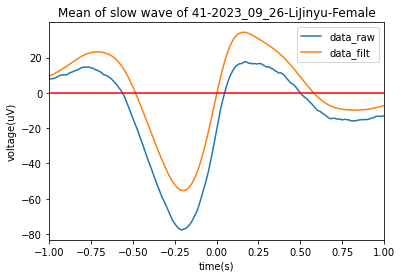

In [117]:
t = np.linspace(-1, 1, 1000)
plt.plot(t, so_wave_avg)
plt.plot(t, so_wave_filt_avg)
plt.hlines(0, xmin=-2, xmax=2, colors="r")
plt.xlim([-1, 1])
plt.legend(["data_raw", "data_filt"])
plt.xlabel("time(s)")
plt.ylabel("voltage(uV)")
plt.title("Mean of slow wave of %s" % subject)
plt.show()